In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [9]:
df.head

<bound method NDFrame.head of                                         Flow ID       Source IP   Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1         192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2         192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3       192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4       192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   
...                                         ...             ...           ...   
225740     192.168.10.15-72.21.91.29-61374-80-6     72.21.91.29            80   
225741     192.168.10.15-72.21.91.29-61378-80-6     72.21.91.29            80   
225742     192.168.10.15-72.21.91.29-61375-80-6     72.21.91.29            80   
225743    192.168.10.15-8.41.222.187-61323-80-6    8.41.222.187            80   
225744      192.168.10.15-8.43.72.21-61326-80-6      8.43.72.21            80  

In [10]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [11]:
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [13]:
df.isnull().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
 Label               0
Length: 85, dtype: int64

In [14]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,225745.000000,225745.00000,225745.000000,2.257450e+05,225745.000000,225745.000000,225745.000000,2.257450e+05,225745.000000,225745.000000,...,225745.000000,225745.000000,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05,2.257450e+05
mean,38257.568402,8879.61946,7.600288,1.624165e+07,4.874916,4.572775,939.463346,5.960477e+03,538.535693,27.882221,...,3.311497,21.482753,1.848261e+05,1.293436e+04,2.080849e+05,1.776201e+05,1.032214e+07,3.611943e+06,1.287813e+07,7.755355e+06
std,23057.302075,19754.64740,3.881586,3.152437e+07,15.422874,21.755356,3249.403484,3.921834e+04,1864.128991,163.324159,...,12.270018,4.166799,7.979250e+05,2.102737e+05,9.002350e+05,7.842602e+05,2.185303e+07,1.275689e+07,2.692126e+07,1.983109e+07
min,0.000000,0.00000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,18990.000000,80.00000,6.000000,7.118000e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49799.000000,80.00000,6.000000,1.452333e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,58296.000000,80.00000,6.000000,8.805237e+06,5.000000,5.000000,63.000000,1.160100e+04,34.000000,6.000000,...,4.000000,20.000000,1.878000e+03,0.000000e+00,1.878000e+03,1.862000e+03,8.239725e+06,0.000000e+00,8.253838e+06,7.422849e+06
max,65534.000000,65532.00000,17.000000,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,...,1931.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [15]:
df.duplicated().sum()

2

In [16]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                         Flow ID       Source IP   Source Port  \
0       192.168.10.5-104.16.207.165-54865-443-6  104.16.207.165           443   
1         192.168.10.5-104.16.28.216-55054-80-6   104.16.28.216            80   
2         192.168.10.5-104.16.28.216-55055-80-6   104.16.28.216            80   
3       192.168.10.16-104.17.241.25-46236-443-6   104.17.241.25           443   
4       192.168.10.5-104.19.196.102-54863-443-6  104.19.196.102           443   
...                                         ...             ...           ...   
225740     192.168.10.15-72.21.91.29-61374-80-6     72.21.91.29            80   
225741     192.168.10.15-72.21.91.29-61378-80-6     72.21.91.29            80   
225742     192.168.10.15-72.21.91.29-61375-80-6     72.21.91.29            80   
225743    192.168.10.15-8.41.222.187-61323-80-6    8.41.222.187            80   
225744      192.168.10.15-8.43.72.21-61326-80-6      8.43.72.21   

In [17]:
df.groupby(' Label').size()

 Label
BENIGN     97718
DDoS      128027
dtype: int64

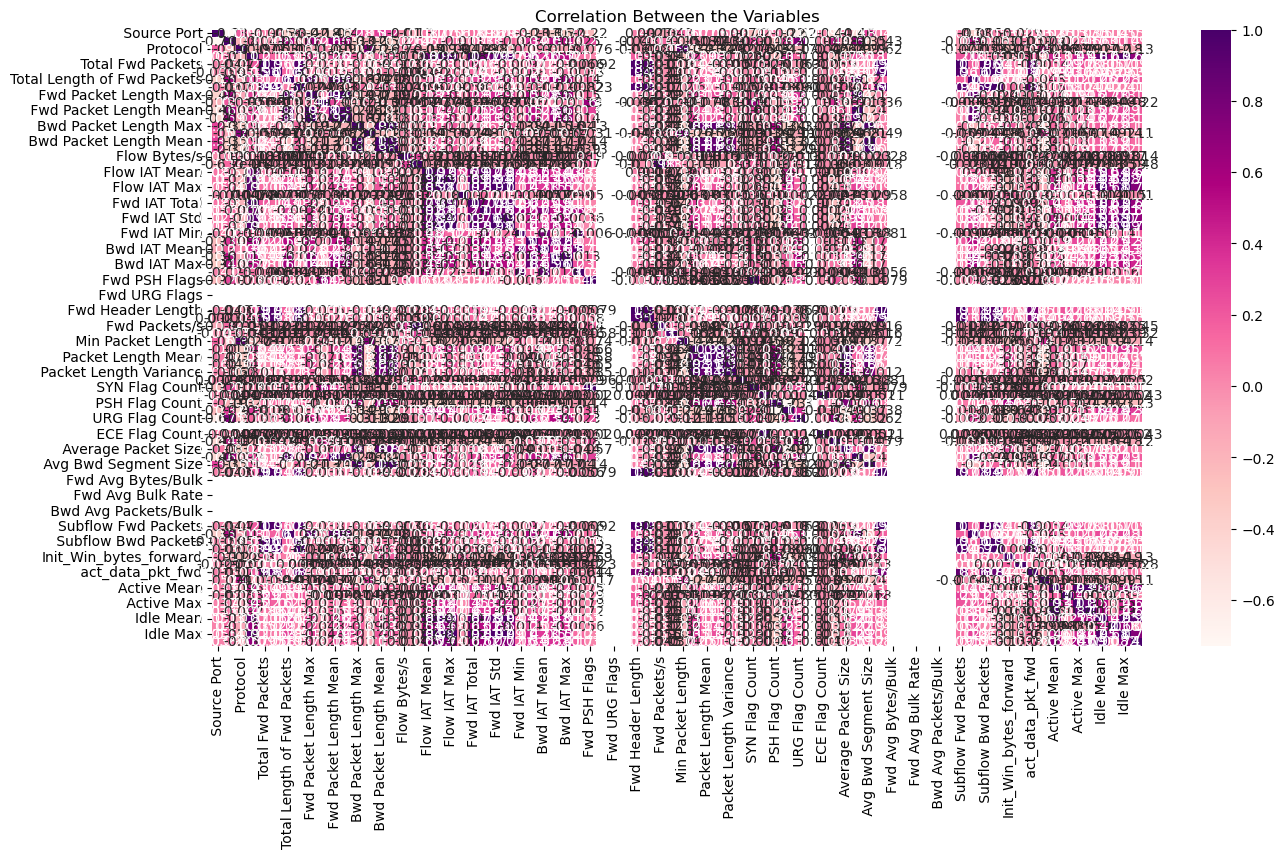

In [18]:
numeric_data = df.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()


In [19]:
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=low_variance_cols, inplace=True)
print("Dropped low variance columns:", low_variance_cols)


Dropped low variance columns: [' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' CWE Flag Count', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [20]:
numeric_df = df.select_dtypes(include=[np.number])

# 3. Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

In [21]:
 # 4. Find highly correlated columns (threshold = 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.9)]
df.drop(columns=high_corr_cols, inplace=True)
print("Dropped highly correlated columns:", high_corr_cols)

Dropped highly correlated columns: [' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min']


In [22]:
# 5. Optionally drop low-correlation columns (e.g., max corr < 0.1)
low_corr_cols = [col for col in corr_matrix.columns if corr_matrix[col].drop(col).max() < 0.1]
df.drop(columns=low_corr_cols, inplace=True)
print("Dropped low-correlation columns:", low_corr_cols)


Dropped low-correlation columns: []


In [23]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1    Source IP                   225745 non-null  object 
 2    Source Port                 225745 non-null  int64  
 3    Destination IP              225745 non-null  object 
 4    Destination Port            225745 non-null  int64  
 5    Protocol                    225745 non-null  int64  
 6    Timestamp                   225745 non-null  object 
 7    Flow Duration               225745 non-null  int64  
 8    Total Fwd Packets           225745 non-null  int64  
 9   Total Length of Fwd Packets  225745 non-null  int64  
 10   Fwd Packet Length Max       225745 non-null  int64  
 11   Fwd Packet Length Min       225745 non-null  int64  
 12  Bwd Packet Length Max        225745 non-null  int64  
 13 

In [25]:
df.isnull().sum()

Flow ID                        0
 Source IP                     0
 Source Port                   0
 Destination IP                0
 Destination Port              0
 Protocol                      0
 Timestamp                     0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   4
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Min                  0
 Fwd IAT Min                   0
Bwd IAT Total                  0
 Bwd IAT Mean                  0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd Packets/s                 0
 Min Packet Length             0
 Max Packet Length             0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag 

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Flow ID                        0
 Source IP                     0
 Source Port                   0
 Destination IP                0
 Destination Port              0
 Protocol                      0
 Timestamp                     0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Min                  0
 Fwd IAT Min                   0
Bwd IAT Total                  0
 Bwd IAT Mean                  0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd Packets/s                 0
 Min Packet Length             0
 Max Packet Length             0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag Count                0
 URG Flag 

In [28]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


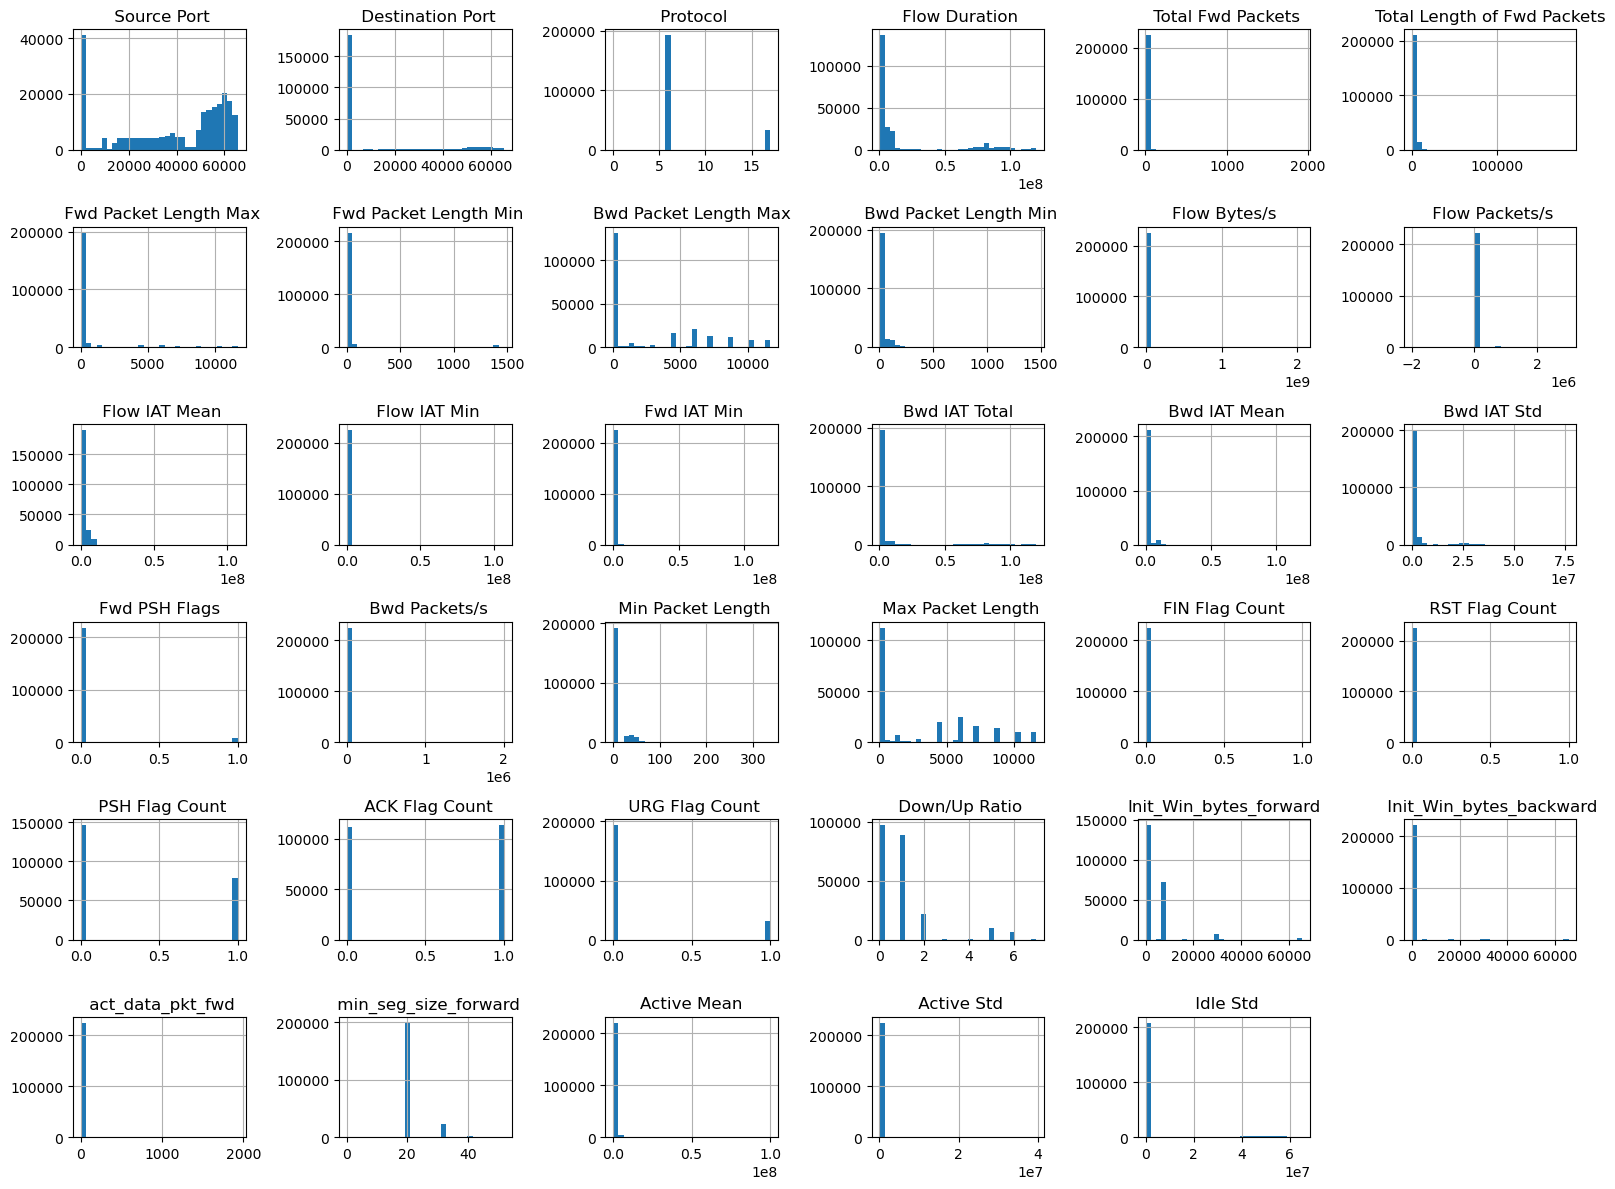

In [29]:
df.select_dtypes(include=np.number).hist(bins=30, figsize=(16, 12))
plt.tight_layout()
plt.show()


In [30]:
df[' Label'].value_counts()

 Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64

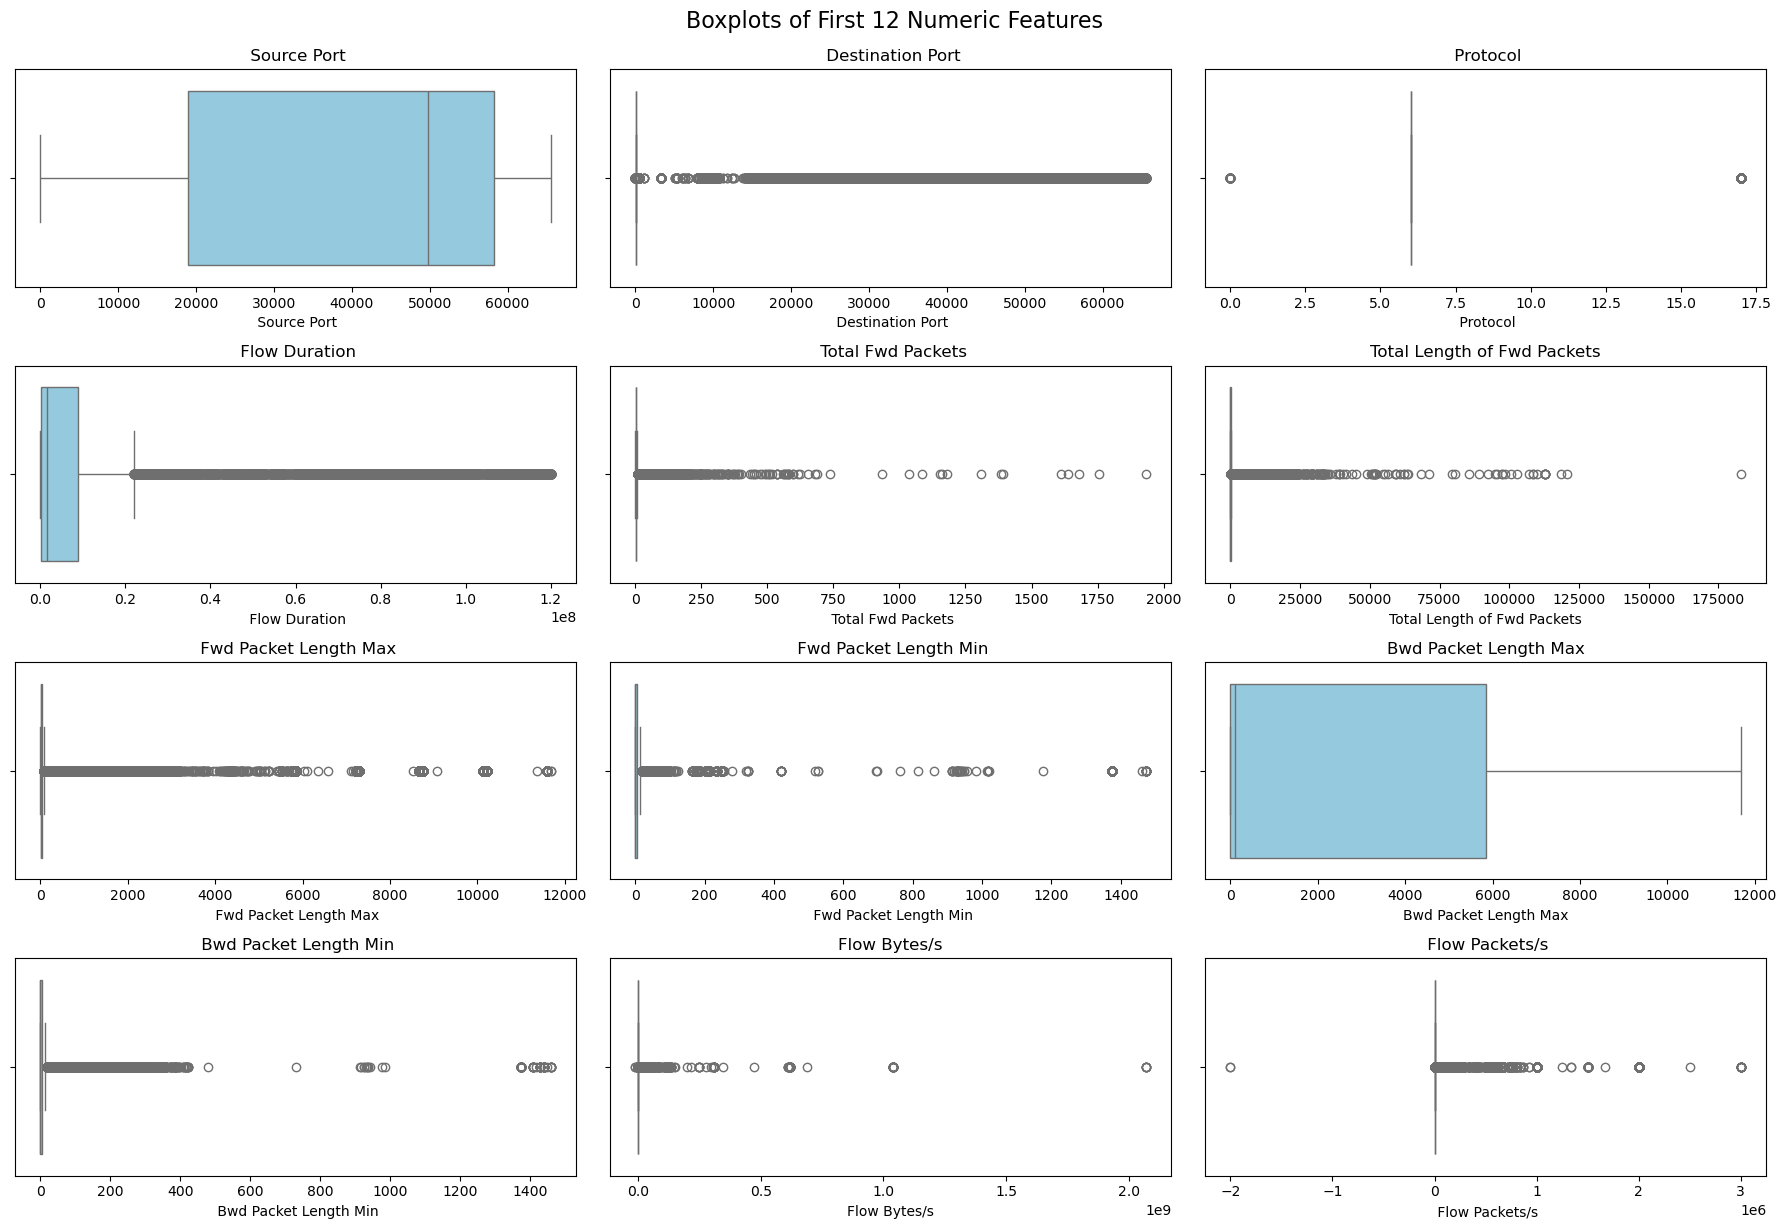

In [31]:
# Plot boxplots for outlier detection (first 12 numeric columns)
numeric_cols = df.select_dtypes(include='number').columns[:12]
plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.suptitle("Boxplots of First 12 Numeric Features", fontsize=16, y=1.02)
plt.show()

In [32]:
skewness = df.skew(numeric_only=True).sort_values(ascending=False)
print("Skewness:\n", skewness)

Skewness:
  RST Flag Count                91.415414
 act_data_pkt_fwd              79.255493
 Active Std                    77.532924
Flow Bytes/s                   73.846792
 Total Fwd Packets             59.632993
 Bwd Packets/s                 56.170910
 Flow IAT Min                  55.919064
 Fwd IAT Min                   22.686686
FIN Flag Count                 19.350731
Active Mean                    15.184942
 Bwd IAT Mean                  14.213035
 Flow Packets/s                13.035160
 Init_Win_bytes_backward       11.395613
 Bwd Packet Length Min         10.396630
 Fwd Packet Length Min          8.039989
Total Length of Fwd Packets     7.521745
Fwd PSH Flags                   5.212453
 Bwd IAT Std                    4.500277
Init_Win_bytes_forward          4.306133
 Flow IAT Mean                  4.177415
 Fwd Packet Length Max          4.087658
 Min Packet Length              3.789101
Bwd IAT Total                   3.760687
 Idle Std                       3.357599
 min_

In [33]:
skewed_cols = [
    ' RST Flag Count', ' act_data_pkt_fwd', ' Active Std', 'Flow Bytes/s',
    ' Total Fwd Packets', ' Bwd Packet Length Min', ' Fwd IAT Min',
    ' Flow IAT Min', 'FIN Flag Count', 'Active Mean', ' Bwd IAT Mean',
    ' Flow Packets/s', ' Init_Win_bytes_backward', ' Bwd Packet Length Min',
    ' Fwd Packet Length Min', 'Total Length of Fwd Packets'
]

# Apply log1p (handles 0 values safely)
for col in skewed_cols:
    df[col] = np.log1p(df[col])


C:\Users\student\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\student\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Step 2: Replace Inf values with NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Step 3: Fill NaNs with column means
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Step 4: Scale numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
# Step 4: Save the transformed and scaled dataset
df.to_csv('final_preprocessed_dataset.csv', index=False)
print("Final dataset saved as 'final_preprocessed_dataset.csv'")

Final dataset saved as 'final_preprocessed_dataset.csv'


In [ ]:
df.info()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('final_preprocessed_dataset.csv')

target_col = ' Label'

if df[target_col].dtype == 'object':
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])

X = df.drop(columns=[target_col])
y = df[target_col]
# STEP 3: Drop non-numeric (object-type) columns from features
X = df.drop(columns=[target_col])
X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
y = df[target_col]

# STEP 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# STEP 5: Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# STEP 6: Make predictions
y_pred = clf.predict(X_test)

# STEP 7: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
print(y.value_counts())

In [ ]:
# Featur Importance
import matplotlib.pyplot as plt

importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[-15:]  # Top 15 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(clf, 'trained_model.pkl')